In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from constant import HEADER_NAME, COLUMNS_TO_DROP

In [2]:
m7 = pd.read_csv('set7m_12monthly_data_0.txt', index_col=False, names=HEADER_NAME, sep='\t').drop(columns=COLUMNS_TO_DROP)
c7 = pd.read_csv('set7c_14monthly_data_0.txt', index_col=False, names=HEADER_NAME, sep='\t').drop(columns=COLUMNS_TO_DROP)
cr7 = pd.read_csv('set7cr_100monthly_data_0.txt', index_col=False, names=HEADER_NAME, sep='\t').drop(columns=COLUMNS_TO_DROP)

In [9]:
m7

,KNY--C1x,KNY--C1X,KNY--C2x,KNY--C2X,KNY--Y1x,KNY--Y1X,KNY--Y2x,KNY--Y2X,KYY--C1x,KYY--C1X,...,TNFNFY2x,TNFNFY2X,TYFYFC1x,TYFYFC1X,TYFYFC2x,TYFYFC2X,TYFYFY1x,TYFYFY1X,TYFYFY2x,TYFYFY2X
0,0.000000,0,0.000000,0,0.000000,0,0.000000,0,0.000000,0,...,0,0,0.0,0,0,0,0,0,0,0
1,0.000000,0,0.000000,0,0.000000,0,0.000000,0,0.000000,0,...,0,0,0.0,0,0,0,0,0,0,0
2,0.000000,0,0.000000,0,0.000000,0,0.000000,0,0.000000,0,...,0,0,0.0,0,0,0,0,0,0,0
3,0.000000,0,0.000000,0,0.000000,0,0.000000,0,0.000000,0,...,0,0,0.0,0,0,0,0,0,0,0
4,0.000000,0,0.000000,0,0.000000,0,0.000000,0,0.000000,0,...,0,0,0.0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
356,0.001390,0,0.001361,0,0.001133,0,0.000025,0,0.000968,0,...,0,0,0.0,0,0,0,0,0,0,0
357,0.001364,0,0.001476,0,0.001140,0,0.000031,0,0.000860,0,...,0,0,0.0,0,0,0,0,0,0,0
358,0.001322,0,0.001481,0,0.001193,0,0.000046,0,0.000753,0,...,0,0,0.0,0,0,0,0,0,0,0
359,0.001371,0,0.001460,0,0.001353,0,0.000056,0,0.000713,0,...,0,0,0.0,0,0,0,0,0,0,0


In [5]:
def calcl_het_val(nparray):
  het = 1 - np.sum(np.square(nparray))
  mysum = np.sum(nparray)
  assert round(mysum) == 1
  return het

In [6]:
het_calc_time = list(range(120,360,30))

In [7]:
het_mft = []
het_cyc = []
het_cyc_rev = []

for i in het_calc_time:
  het_mft.append(calcl_het_val(m7.iloc[i,:].values))
  het_cyc.append(calcl_het_val(c7.iloc[i,:].values))
  het_cyc_rev.append(calcl_het_val(cr7.iloc[i,:].values))

Plot

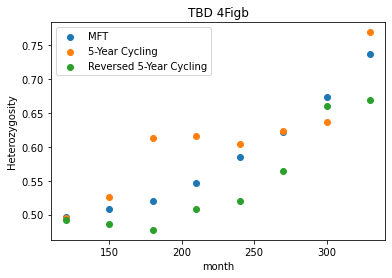

In [20]:
plt.scatter(het_calc_time, het_mft, label='MFT')
plt.scatter(het_calc_time, het_cyc, label='5-Year Cycling')
plt.scatter(het_calc_time, het_cyc_rev, label='Reversed 5-Year Cycling')
plt.title('TBD 4Figb')
plt.xlabel('month')
plt.ylabel('Heterozygosity')
plt.legend()

Print out

**Note:** the reported times are:
- end of burn in, year #0 (#10 if not calibrated)
- year #2.5 ✓
- year #5
- year #7.5 ✓
- year #10
- year #12.5 ✓
- year #15
- year #17.5 ✓
- year #20

In [4]:
print('---MFT---')
for i in range(120,360,30):
  calcl_het_val(m7.iloc[i,:].values)

---MFT---
Het = 0.4965 / 1.0000
Het = 0.5088 / 1.0000
Het = 0.5199 / 1.0000
Het = 0.5463 / 1.0000
Het = 0.5851 / 1.0000
Het = 0.6226 / 1.0000
Het = 0.6737 / 1.0000
Het = 0.7370 / 1.0000


In [5]:
print('---Cyc---')
for i in range(120,360,30):
  calcl_het_val(c7.iloc[i,:].values)

---Cyc---
Het = 0.4945 / 1.0000
Het = 0.5259 / 1.0000
Het = 0.6133 / 1.0000
Het = 0.6154 / 1.0000
Het = 0.6043 / 1.0000
Het = 0.6236 / 1.0000
Het = 0.6367 / 1.0000
Het = 0.7692 / 1.0000


In [6]:
print('---Cyc Reversed---')
for i in range(120,360,30):
  calcl_het_val(cr7.iloc[i,:].values)

---Cyc Reversed---
Het = 0.4920 / 1.0000
Het = 0.4866 / 1.0000
Het = 0.4775 / 1.0000
Het = 0.5090 / 1.0000
Het = 0.5204 / 1.0000
Het = 0.5639 / 1.0000
Het = 0.6597 / 1.0000
Het = 0.6691 / 1.0000
